**Text-based author classification on the Reuter Corpus C50 dataset**

**Problem Description**

In Reuter C50 dataset, my work has been focused on author classification. I trained several machine learning algorithms using the C50 train dataset, evaluated the model using the C50 test dataset and compared the different models based on their test set classification accuracies. 

The model is intended to classify authors based on linguistic analysis of the documents using TF-IDF matrices. TfidfVectorizer transforms the preprocessed list of words into numerical representation, inflating the importance of terms that are frequent within a document(TF) but are rare across all the documents in the corpus(IDF).

In [46]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer
nltk.download('punkt') # for tokenizing

# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("C:/Users/kowsh/OneDrive/Documents/MSBA Coursework/ISLR by Prof James/STA380-master/STA380-master/data/ReutersC50/C50train")
test_texts, test_labels = read_data_from_directory("C:/Users/kowsh/OneDrive/Documents/MSBA Coursework/ISLR by Prof James/STA380-master/STA380-master/data/ReutersC50/C50test")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kowsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
train_texts[0]

'The Internet may be overflowing with new technology but crime in cyberspace is still of the old-fashioned variety.\nThe National Consumers League said Wednesday that the most popular scam on the Internet was the pyramid scheme, in which early investors in a bogus fund are paid off with deposits of later investors.\nThe league, a non-profit consumer advocacy group, tracks web scams through a site it set up on the world wide web in February called Internet Fraud Watch at http://www.fraud.org.\nThe site, which collects reports directly from consumers, has been widely praised by law enforcement agencies.\n"Consumers who suspect a scam on the Internet have critical information," said Jodie Bernstein, director of the Federal Trade Commission\'s Bureau of Consumer Protection. Internet Fraud Watch "has been a major help to the FTC in identifying particular scams in their infancy."\nIn May, for example, the commission used Internet reports to shut down a site run by Fortuna Alliance that had t

In [48]:
# Helper function to tokenize, remove punctuation, and stem
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kowsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Basic Statistics
print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts]
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts]

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")

Total number of training documents: 2500
Total number of test documents: 2500

Average document length in training set: 328.4308 words
Minimum document length in training set: 33 words
Maximum document length in training set: 957 words

Average document length in test set: 333.2564 words
Minimum document length in test set: 42 words
Maximum document length in test set: 934 words



Most common words across the training set:
said: 19856
's: 14872
'': 13882
``: 13712
year: 6146
compani: 5651
would: 5237
percent: 5211
million: 4942
market: 4629


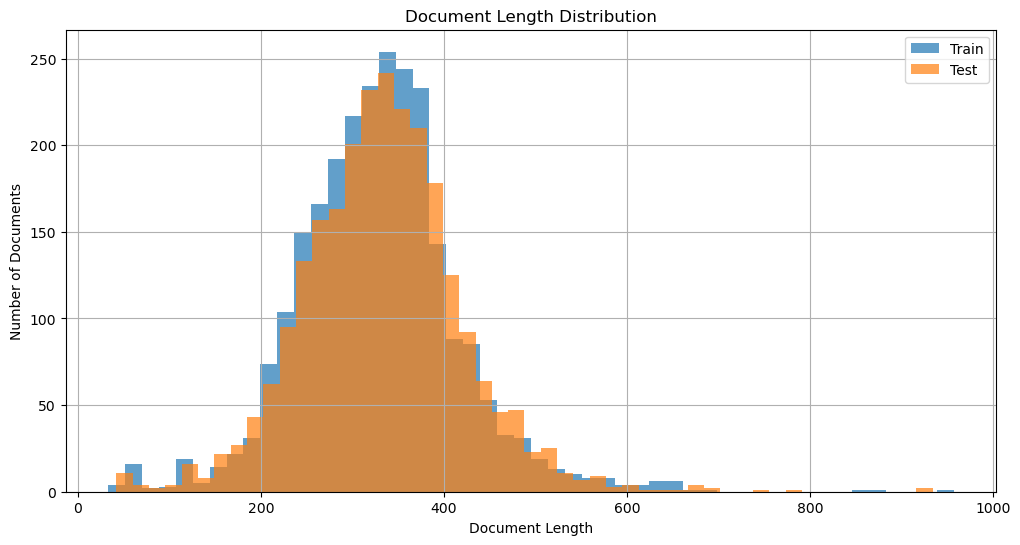

In [50]:
# Term Frequencies
all_tokens = [token for text in train_texts for token in preprocess_text(text)]
common_tokens = Counter(all_tokens).most_common(10)
print("\nMost common words across the training set:")
for token, freq in common_tokens:
    print(f"{token}: {freq}")

# Document Length Distribution
plt.figure(figsize=(12, 6))
plt.hist(train_doc_lengths, bins=50, alpha=0.7, label='Train')
plt.hist(test_doc_lengths, bins=50, alpha=0.7, label='Test')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Number of Documents')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
# The Tfidf Vectorizer will use our custom tokenizer/preprocesser
vectorizer = TfidfVectorizer(tokenizer=preprocess_text,max_features=2500) #using the preprocess_text function defined earlier
train_dtm = vectorizer.fit_transform(train_texts)
test_dtm = vectorizer.transform(test_texts)

c:\Users\kowsh\anaconda3\envs\DatasScienceProgrammingwithPy\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [52]:
print(len(train_labels)) #train_labels is equivalent to y_train
print(train_dtm.shape) 
print(len(test_labels)) #test_labels is equivalent to y_test
print(test_dtm.shape)

2500
(2500, 2500)
2500
(2500, 2500)


**Statistical Tools Used and Problem Solving Approach**

I have implemented a diverse set of classification algorithms from scikit learn, xgboost and pytorch (for neural nets) to tackle our author classification task. We have leveraged traditional machine learning techniques (like Logistic Regression and Naive Bayes), few advanced tree based methods (like Random Forest and XGBoost), ensemble algorithms(to combine the strength of individual models) and deep learning techniques like neural networks. 

1. Logistic Regression : I have used this algorithm to analyze how well a linear binary classification model performs in a multi-class classification scenario.

2. Multinomial Naive Bayes : I have used Multinomial Naive Bayes, a probability-based multi-class classifier that assumes independence between features, for author classification. This algorithm is known to be well-suited for text classification tasks where features are often word counts/TF-IDFs. 

3. Random Forest : Random Forest creates multiple decision trees during training and combines their predictions to make a final decision. Since it handles non-linearity well and can perform with high-dimensional data, we expect it to yield competitive results in our case.  

4. XG Boosting : XGBoost (Extreme Gradient Boosting) builds a strong predictive model by adding up the predictions of multiple weak models. It is basically a sequential training process where each new model works on reducing the residuals of the previous model. 

5. Ensemble Algorithm : Ensemble algorithms involve combining the predictions of multiple strong models to generate a more accurate and robust final prediction. We have combined the predictions of Multinomial Naive Bayes and Random Forest - as these gave the highest accuracy at an individual level for our author clasification task. In this case, I used soft voting with the Voting Classifier from sklearn, where I basically take a weighted average of the class probabilites from each of the two models and predict the class with the highest weighted average for a particular document. 

6. Neural Networks : I have used the PyTorch Library to build and train our neural networks for author classification. I also experimented with different network design parameters, activation functions, hidden layers and model learning optimization techniques. But, due to limited system processing capabilities, we could only optimize the performance of neural networks to some extent.

**Note :** 
1. I have performed 5-fold cross validation on all the traditional and tree-based machine learning algorithms using GridSearchCV function from the model selection module of scikit-learn. We use cross validation to select the best hyper parameters and fit the model on the entire training dataset using the selected best hyperparameters. Model evaluation is then performed on this best model using the test data set. 

2. In xgboost, I did not perform cross validation or iterative hyper-parameter tuning as the system could not take up that level of computational complexity.

**Logistic Regression**

*Parameter Tuning Using 5-fold Cross Validation*

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd

#creating our logistic regression model with lasso regularization and liblinear algorithm 
logis_text = LogisticRegression(penalty='l1',solver='liblinear')

#parameter tuning using 5-fold cross validation
param_grid={'C':[0.001,0.01,0.1,10,100,200,300,1000]}
gridsearch=GridSearchCV(logis_text,param_grid,cv=5,scoring="accuracy")

gridsearch.fit(train_dtm,train_labels)

best_params_list =[]
best_scores_list=[]

for param, score in zip(gridsearch.cv_results_['params'],gridsearch.cv_results_['mean_test_score']):
    best_params_list.append(param)
    best_scores_list.append(round((score*100),3))

cvresults_df=pd.DataFrame({"Penalty Parameters": best_params_list,"Accuracy(%)": best_scores_list})
print(cvresults_df)


  Penalty Parameters  Accuracy(%)
0       {'C': 0.001}         2.00
1        {'C': 0.01}         2.00
2         {'C': 0.1}        10.52
3          {'C': 10}        63.92
4         {'C': 100}        65.28
5         {'C': 200}        65.36
6         {'C': 300}        65.32
7        {'C': 1000}        65.60


*Fitting the model with best parameter and training data + Model Evaluation*

In [55]:
from sklearn.metrics import accuracy_score

#fitting the model with the chosen parameter again on the entire training data and measuring accuracy
best_model = LogisticRegression(penalty='l1', solver='liblinear', C=1000)

best_model.fit(train_dtm,train_labels)

#making predictions for the documents in the test file
predictions = best_model.predict(test_dtm)

#calculating accuracy
acc_logis=(round(accuracy_score(test_labels,predictions),2))*100
print(f"Test Set Accuracy from Logistic Regression : {acc_logis:.2f}%")

Test Set Accuracy from Logistic Regression : 61.00%


**Multinomial Naive Bayes**

*Parameter Tuning Using 5-fold Cross Validation*

In [56]:
from sklearn.naive_bayes import MultinomialNB

#creating the Naive Bayes model
naive_bayes = MultinomialNB()

#parameter tuning using 5-fold cross validation
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')

grid_search.fit(train_dtm, train_labels)

best_params_list = []
best_scores_list = []

for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    best_params_list.append(param)
    best_scores_list.append(round((score*100),3))

cvresults_df = pd.DataFrame({"Alpha Parameters": best_params_list, "Accuracy(%)": best_scores_list})
print(cvresults_df)

   Alpha Parameters  Accuracy(%)
0  {'alpha': 0.001}        68.16
1   {'alpha': 0.01}        69.04
2    {'alpha': 0.1}        68.44
3    {'alpha': 1.0}        65.48
4   {'alpha': 10.0}        62.40
5  {'alpha': 100.0}        60.92


*Fitting the model with best parameter and training data + Model Evaluation*

In [57]:
from sklearn.metrics import accuracy_score

#fitting the model with the chosen parameter again on the entire training data and measuring accuracy
best_model = MultinomialNB(alpha=0.01)

best_model.fit(train_dtm,train_labels)

#making predictions for the documents in the test file
predictions = best_model.predict(test_dtm)

#calculating accuracy
acc_nb=round((accuracy_score(test_labels,predictions)*100),2)
print(f"Test Set Accuracy from Multinomial Naive Bayes : {acc_nb:.2f}%")

Test Set Accuracy from Multinomial Naive Bayes : 64.76%


**Random Forest**

*Performing hyper parameter tuning using 5-fold cross validation* 

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
random_forest = RandomForestClassifier()

# Parameter tuning using 5-fold cross validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

grid_search.fit(train_dtm, train_labels)

best_params_list = []
best_scores_list = []

for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    best_params_list.append(str(param))
    best_scores_list.append(round((score*100),3))

cvresults_df = pd.DataFrame({"Parameters": best_params_list, "Accuracy(%)": best_scores_list})
print(cvresults_df)


                                           Parameters  Accuracy(%)
0   {'max_depth': 5, 'min_samples_split': 2, 'n_es...        47.36
1   {'max_depth': 5, 'min_samples_split': 2, 'n_es...        50.72
2   {'max_depth': 5, 'min_samples_split': 2, 'n_es...        53.96
3   {'max_depth': 5, 'min_samples_split': 5, 'n_es...        48.28
4   {'max_depth': 5, 'min_samples_split': 5, 'n_es...        50.20
5   {'max_depth': 5, 'min_samples_split': 5, 'n_es...        52.76
6   {'max_depth': 5, 'min_samples_split': 10, 'n_e...        46.96
7   {'max_depth': 5, 'min_samples_split': 10, 'n_e...        51.32
8   {'max_depth': 5, 'min_samples_split': 10, 'n_e...        52.88
9   {'max_depth': 10, 'min_samples_split': 2, 'n_e...        55.72
10  {'max_depth': 10, 'min_samples_split': 2, 'n_e...        59.44
11  {'max_depth': 10, 'min_samples_split': 2, 'n_e...        61.76
12  {'max_depth': 10, 'min_samples_split': 5, 'n_e...        56.52
13  {'max_depth': 10, 'min_samples_split': 5, 'n_e...        5

*Fitting the model with the best hyperparameters and training data + Model Evaluation*

In [60]:
#fitting the model with the chosen parameter again on the entire training data and measuring accuracy
best_model = RandomForestClassifier(n_estimators=200,max_depth=20,min_samples_split=10)

best_model.fit(train_dtm,train_labels)

#making predictions for the documents in the test file
predictions = best_model.predict(test_dtm)

#calculating accuracy
acc_rf=round((accuracy_score(test_labels,predictions)*100),2)
print(f"Test Set Accuracy from Random Forest : {acc_rf}%")

Test Set Accuracy from Random Forest : 60.8%


**XG (Extra Gradient) Boosting : Model Fitting + Model Evaluation**

In [61]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score

boost_model=xgb.XGBClassifier(n_estimators=200, learning_rate=0.001, max_depth=3)

boost_model.fit(xtrain_tensor,ytrain_tensor)

pred=boost_model.predict(xtest_tensor)

boost_acc=(accuracy_score(ytest_tensor,pred))*100

print(f"Test Accuracy from XG Boosting: {boost_acc:.2f}%")

Test Accuracy from XG Boosting: 52.20%


**Ensemble Algorithm : Multinomial Naive Bayes + Random Forest**

*Part 1 : For Individual Models - Hyper Parameter Tuning with 5-fold CV + Model Fitting on Training Data with best hyperparamers*

*Part 2 : Creating Ensemble of Individual Models using Voting Classifier + Fitting Ensemble Model on Training Data + Model Evaluation using Test Set*

In [64]:
#Ensemble of Naive Bayes and Random Forest

from sklearn.ensemble import VotingClassifier

#creating the individual models
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier()

#performing hyper parameter tuning
param_grid_nb = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

#performing 5-fold cross validation for naive bayes and random forest
grid_search_nb = GridSearchCV(naive_bayes, param_grid_nb, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='accuracy')

#fitting the individual models
grid_search_nb.fit(train_dtm, train_labels)
grid_search_rf.fit(train_dtm, train_labels)

#defining the ensemble model with voting classifier based on soft voting for calculating weighted probabilities for each class
ensemble = VotingClassifier(
    estimators=[('nb', grid_search_nb.best_estimator_), ('rf', grid_search_rf.best_estimator_)],
    voting='soft' 
)

#fitting the ensemble model
ensemble.fit(train_dtm, train_labels)

#making predictions for test data based on ensemble model
ensemble_predictions = ensemble.predict(test_dtm)

#calculating ensemble accuracy
ensemble_accuracy = round((((ensemble_predictions == test_labels).sum() / len(test_labels))*100),3)
print(f"Ensemble (Random Forest and Naive Bayes) Accuracy: {ensemble_accuracy:.2f}%")

Ensemble (Random Forest and Naive Bayes) Accuracy: 66.40%


**Deep Learning : Neural Network Implementation for Author Classification Problem**

*Creating the neural network design - input/ouput layers, hidden layers and activation functions*

I have designed the neural network to have 3 linear layers. Our first fully connected layer takes 2500 input neurons(all the features from the training set) and outputs 5000 neurons. The output from the first layer are then passed through a relu activation layer, which introduces non-linearity into the network, enabling the networks to learn the complex relationships in data. The third layer takes 5000 neurons as input and outputs 10,000 neurons. The outputs from the third layer are then passed on to the fourth layers which converts these 10,000 neurons into raw scores for 50 author classes. 

I have not created a soft max activation layer here because we are using CrossEntropyLoss from nn module as our loss function. CrossEntropyLoss function internally applies the soft max activation to our network output and then computes the cross entropy loss - the negative log likelihood loss using the actual author labels in the y tensor. Cross entropy loss basically quantfies the difference between the predicted labels and actual labels and our optimisation algorithm aims to minimise this loss.  

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim

#constructing a classification neural network
class AuthorClassifier(nn.Module):
    def __init__(self):
        super(AuthorClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.layer3 = nn.Linear(hidden_size1, hidden_size2)
        self.layer5 = nn.Linear(hidden_size2, num_class)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer3(x)
        x = self.layer5(x)
        return x

I have used label encoder from scikit-learn to convert the categorical author labels of both test and train datasets to numerical labels. We also had to use .LongTensor for the author label lists to ensure that these labels are treated as integers and not floating point numbers. The tfidf vectors are converted to torch tensors, as our inputs need to be in a datatype that our neural network recognizes and understands. 

Note : I also tried to use one hot encoding to convert the labels to dummy variables. But, it was making the problem way more complex and we weren't able to trouble shoot it. But, this is something I have included in the way forward buckets of things that could be improved upon. 

In [66]:
from sklearn.preprocessing import LabelEncoder

#converting author names to numerical labels
label_encoder = LabelEncoder()
label_encoder.fit(train_labels)

train_label_indices = label_encoder.transform(train_labels)
test_label_indices = label_encoder.transform(test_labels)

xtrain_tensor = torch.Tensor(train_dtm.toarray())
ytrain_tensor = torch.LongTensor(train_label_indices)  
xtest_tensor = torch.Tensor(test_dtm.toarray())
ytest_tensor = torch.LongTensor(test_label_indices)  


In [67]:
import pandas as pd
import numpy as np
input_size=train_dtm.shape[1]
hidden_size1=input_size*2
hidden_size2=hidden_size1*2
num_class=50

I implemented the training loop for our Author Classifier neural netwok using a learning rate (step size) of 0.001 and 10 epochs. The loops iterates over 10 epochs, performs forward and backward passes and updates the model parameters using Adam optimizer based on the gradients computed during back propagation. 

In [68]:

learning_rate = 0.001
num_epochs = 10

model = AuthorClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(xtrain_tensor)
    loss = criterion(outputs, ytrain_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/10], Loss: 3.9121
Epoch [2/10], Loss: 3.8027
Epoch [3/10], Loss: 3.5997
Epoch [4/10], Loss: 3.2317
Epoch [5/10], Loss: 2.6848
Epoch [6/10], Loss: 2.0439
Epoch [7/10], Loss: 1.4490
Epoch [8/10], Loss: 1.0127
Epoch [9/10], Loss: 0.7314
Epoch [10/10], Loss: 0.5463


After training the author classifier network, I am evaluating how well the network performs on unseen test data in this phase. The network generates 50 raw logit scores for each test document which are then converted to class probabilities using the soft max function. Each row of the output of softmax function contains 50 class probabilities for each test document. I then select the class index with highest probability for each document and store it in predicted_classes. But, these will be integer labels and will be difficult to interpret. Hence, I used inverse tranform function from label_encoder to convert these numerical author labels to the corresponding predicted categorical author labels. 

In [69]:
import torch.nn.functional as F
model.eval()
with torch.no_grad():
    test_outputs = model(xtest_tensor)  #xtest_tensor contains TF-IDF matrix for c50 test
    predicted_probs = F.softmax(test_outputs, dim=1)  #applying softmax to get class probabilities for each of the 50 authors
    predicted_classes = predicted_probs.argmax(dim=1)  #getting the predicted class (author) for each document

#converting predicted_classes tensor to a NumPy array and inverse transform to get actual author labels
predicted_author_labels = label_encoder.inverse_transform(predicted_classes.numpy())


*Calculating the classification accuracy of neural network*

In [70]:
#calculating accuracy
correct_predictions = (predicted_classes.numpy() == ytest_tensor.numpy()).sum().item()
total_examples = len(ytest_tensor)
acc_nn = round((correct_predictions / total_examples)*100,2)

print(f"Test Accuracy from Neural Nets: {acc_nn:.2f}%")

Test Accuracy from Neural Nets: 60.88%


**Results**

In [81]:
results_summary=pd.DataFrame({"ML Model":["Logistic Regression","Multinomial Naive Bayes","Random Forest","XGBoosting","Ensemble(Random Forest + Naive Bayes)","Neural Networks"],
"Test Set Accuracy(%)":[acc_logis,acc_nb,acc_rf,boost_acc,ensemble_accuracy,acc_nn]})

#formatting the table

def highlight(row):
    if row.name==4:
        return ["background-color : yellow"]* len(row)
    return [""]*len(row)

formatted_results_summary = results_summary.style.apply(highlight,axis=1)
formatted_results_summary

,ML Model,Test Set Accuracy(%)
0,Logistic Regression,61.000000
1,Multinomial Naive Bayes,64.760000
2,Random Forest,60.800000
3,XGBoosting,52.200000
4,Ensemble(Random Forest + Naive Bayes),66.400000
5,Neural Networks,60.880000


**Conclusion**

In the table given above, I have furnished the test set accuracy percentages we could achieve from each of the 6 ML algorithms we implemented. 

For the author classification problem, the ensemble of Random Forest and Multinomal Naive Bayes gave the best test set accuracy of 66.4% - this means that the ensemble algorithm correctly classified 1660 out of the 2500 test documents with the correct authors.  

I did not create an ensemble of logistic and multinomial naive bayes, because I wanted to include a model with complementing strengths - for example, Multinomial Naive Bayes excels in classifying documents based on word counts and tf-idf frequecies, whereas Random Forest due its ensemble learning will help us understand the complex patterns between the features within/across documents. Thus, I aimed to get the combine the strength of diverse models in order to make accurate and robust predictions for our author classification problem. 

Lack of system processing capabilities to fine tune the neural network optimization was one of the main reasons why I could not boost the performance of our neural nets further. 

**Way Forward**

While 66.4% is the best accuracy I could achieve in this project, I aim to fine tune our models further and overcome some of the roadblocks we faced during the implementation phase. Some of the action items in our 'work in progress' pipeline are listed below. 

1. Exploring optimization of network design parameters (no. of hidden layers, input and output sizes, activation functions..etc ) alongside network learning parameters (epochs and learning schedules) to boost the performance of neural networks. 

2. Exploring the impact of different kinds of encoding for author labels (label, one hot...etc) on the performance of both ensemble learning and deep learning algorithms. 

3. Considering a subset based implementation, where we check how well our model performs when we test only for say, 10,20,30 authors instead of 50 authors all at once. Does the accuracy of the model differ based on the subset size of authors? 

4. Expanding the horizons and understanding the workings of recurrent neural networks such as LSTM (Long Short Term Memory Networks) which seem to have given success in author classification problems as per research papers. 